![title](data_glacier_screenshot_of_assignment.png)

## Final Project- Bank Marketing Campaign EDA Report- Carmelo R. Casiraro (USA), Fenil Mavani (UK), Nazari (UK), Batch Code: LISUM34- Data Glacier Internship

## Problem Statement:
- ABC Bank wants to sell it's term deposit product to customers and before launching the product they want to develop a model which help them in understanding whether a particular customer will buy their product or not (based on customer's past interaction with bank or other Financial Institution).

# Business Understanding

## Objective
To share insights from multiple datasets to develop a model that can help in selling term deposit product.

The analysis involves:
- Bank information understanding
- Data type understanding (whether boolean, string or integer)
- Looking for any problems in the data and coming up with possible solutions
- Eliminating any null values, checking for any skewdness or outliers
- What is the data structure in rows and columns?
- Raising questions and hypothesis- including charts to understand the data
- Creating a Exploratory Data Analysis Report to understand and analyze data to create possible recommendations and solutions off charts created
- What model to develop to help understand the particular customer that will buy the term deposit product or not?

## Overall Goal of The Project
- To generate a EDA report and develop a model with python code to answer questions and make hypotheses about possible solutions and recommendations to sell term deposit to customers.

## Loading Data

In [50]:
import pandas as pd
file_path = 'bank-full.csv'
bank_additional = pd.read_csv('bank-additional-full.csv', sep=';')
data = pd.read_csv(file_path, sep=';')
data.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## Data Structure
- Rows: The dataset contains records of customers who were contacted in the marketing campaign.
- Columns: Each column represents a feature related to the customer's demographics, previous interactions, and campaign details.

In [51]:
import csv

def count_rows(file_path):
    with open(file_path, 'r') as file:
        reader = csv.reader(file)
        row_count = sum(1 for row in reader)
    return row_count

# Specify the path to your CSV file
csv_file_path = 'bank-full.csv'

# Count the number of rows in the CSV file
num_rows = count_rows(csv_file_path)

print(f"The CSV file has {num_rows} rows.")

The CSV file has 45212 rows.


In [52]:
import csv

def count_rows(file_path):
    with open(file_path, 'r') as file:
        reader = csv.reader(file)
        row_count = sum(1 for row in reader)
    return row_count

# Specify the path to your CSV file
csv_file_path = 'bank.csv'

# Count the number of rows in the CSV file
num_rows = count_rows(csv_file_path)

print(f"The CSV file has {num_rows} rows.")

The CSV file has 4522 rows.


## Data Type & Understanding
*Column Descriptions*

- age (Integer): Age of the customer
- job (String): Type of job.
- marital (String): Marital status.
- education (String): Education level.
- default (Boolean): Has credit in default?
- balance (Integer): Account balance.
- housing (Boolean): Has housing loan?
- loan (Boolean): Has personal loan?
- contact (String): Contact communication type.
- day (Integer): Last contact day of the month.
- month (String): Last contact month of the year.
- duration (Integer): Last contact duration (in seconds).
- campaign (Integer): Number of contacts called during this campaign for this client.
- pdays (Integer): Number of days that passed after the client was last contacted from a previous campaign.
- previous (Integer): Number of contacts called before this campaign for this client.
- poutcome (Integer): Outcome of the previous marketing campaign.
- y (Boolean): Has the client subscribed to a term deposit?

## Data Types for Analysis

In [53]:
import pandas as pd
import csv
from typing import Dict
from pprint import pprint

def analyze_csv(file_path: str) -> Dict[str, str]:
    # Read the CSV file
    df = pd.read_csv(file_path, sep=";")
    d = {}
    for column in df.columns:
        dtype = str(df[column].dtype)
        if dtype not in d:
            d[dtype] = []
        d[dtype].append(column)
    return d

pprint(analyze_csv("bank.csv"))

{'int64': ['age',
           'balance',
           'day',
           'duration',
           'campaign',
           'pdays',
           'previous'],
 'object': ['job',
            'marital',
            'education',
            'default',
            'housing',
            'loan',
            'contact',
            'month',
            'poutcome',
            'y']}


## What are possible problems in the data?

### 1) Booleans are represented as yes/no strings

**Solution**: To overcome this problem, when reading the file- 
need to add logic to parse the yes/no into boolean true or false. 

### 2) Null values are represented by the string 'unknown'
**Solution**: Possible solution, use the mean of each column or look at other similar data to predict to a estimated value for the column- (Technique: K nearest neighbors)- if time permits we can implement this technique.

### 3) Unknown values in pdays seem to be represented by -1- we don't know what this means?
**Solution**: We need more information to understand what this represents to consider it in the model.

## Checking for outliers and skewness

### 1) data is semicolon-delimited, not comma-delimited

#### Solution: the argument `sep=";"` must be passed in each call to pd.read_csv()

#### 2) The distribution of labels is skewed heavily to one side, the model may be biased toward that result

In [54]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('bank-full.csv',sep=";")

# Count the values in the last column
value_counts = df.iloc[:, -1].value_counts()

# Print the results
print("Value counts in the last column:")
print(value_counts)

# Calculate percentages
total = value_counts.sum()
percentages = (value_counts / total) * 100

print("\nPercentages:")
for value, count in value_counts.items():
    percentage = percentages[value]
    print(f"{value}: {count} ({percentage:.2f}%)")

Value counts in the last column:
y
no     39922
yes     5289
Name: count, dtype: int64

Percentages:
no: 39922 (88.30%)
yes: 5289 (11.70%)


#### Solution: pre-process the test and training data to remove "no" rows (i.e. take a random sample) until the output distribution is about 50% yes and 50% no

In [55]:
import pandas as pd

def balance_csv(input_file, output_file, sample_size=None):
    # Read the CSV file
    df = pd.read_csv(input_file, sep=';')
    
    # Get the target column (last column)
    target_col = df.columns[-1]
    
    # Group by the target column
    grouped = df.groupby(target_col)
    
    # Determine the sample size for each group
    if sample_size is None:
        sample_size = grouped.size().min()
    else:
        sample_size = min(sample_size // 2, grouped.size().min())
    
    # Take a random sample from each group
    sampled = grouped.apply(lambda x: x.sample(n=sample_size, random_state=42))
    
    # Reset the index
    df_balanced = sampled.reset_index(drop=True)
    
    # Shuffle the DataFrame to mix 'yes' and 'no' rows
    df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)
    
    # Write to output file
    df_balanced.to_csv(output_file, sep=';', index=False)
    
    # Print statistics
    value_counts = df_balanced[target_col].value_counts()
    print(f"Output file created: {output_file}")
    print(f"Yes count: {value_counts.get('yes', 0)}")
    print(f"No count: {value_counts.get('no', 0)}")

# Usage
balance_csv('bank.csv', 'bank_balanced.csv')
balance_csv('bank-full.csv', 'bank-full_balanced.csv')

Output file created: bank_balanced.csv
Yes count: 521
No count: 521


/var/folders/k9/d1czdmc507s2_10s7xd2m8200000gn/T/ipykernel_10909/3863111420.py:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled = grouped.apply(lambda x: x.sample(n=sample_size, random_state=42))
/var/folders/k9/d1czdmc507s2_10s7xd2m8200000gn/T/ipykernel_10909/3863111420.py:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled = grouped.apply(lambda x: x.sample(n=sample_size, random_state=42))


Output file created: bank-full_balanced.csv
Yes count: 5289
No count: 5289


#### 3) There are a significant number of outliers in the numerical columns
### Outlier- is a data point that has a significantly different value than majority of the values in the dataset.

In [56]:
import pandas as pd
import numpy as np

def check_outliers(file_path, delimiter=';'):
    df = pd.read_csv(file_path, delimiter=delimiter)

    def find_outliers(series):
        Q1 = series.quantile(0.25)
        Q3 = series.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        return series[(series < lower_bound) | (series > upper_bound)]

    for column in df.select_dtypes(include=[np.number]).columns:
        outliers = find_outliers(df[column])
        if not outliers.empty:
            print(f"\nOutliers in column '{column}':")
            print(f"Number of outliers: {len(outliers)}")
            print(f"Percentage of outliers: {(len(outliers) / len(df[column])) * 100:.2f}%")

check_outliers('bank-full.csv')


Outliers in column 'age':
Number of outliers: 487
Percentage of outliers: 1.08%

Outliers in column 'balance':
Number of outliers: 4729
Percentage of outliers: 10.46%

Outliers in column 'duration':
Number of outliers: 3235
Percentage of outliers: 7.16%

Outliers in column 'campaign':
Number of outliers: 3064
Percentage of outliers: 6.78%

Outliers in column 'pdays':
Number of outliers: 8257
Percentage of outliers: 18.26%

Outliers in column 'previous':
Number of outliers: 8257
Percentage of outliers: 18.26%


#### Solution: For most numerica columns we impute the mean. For pdays and previous we ignore values that encode false.

In [57]:
import pandas as pd
import numpy as np

file_path = "bank-full.csv"

def impute_outliers(df):
    for column in ["balance","campaign", "duration", "pdays", "previous"]:
        if column == "pdays":
            valid_data = df[df[column] != -1][column]
        elif column == "previous":
            valid_data = df[df[column] != 0][column]
        else:
            valid_data = df[column]
        
        mean = valid_data.mean()
        std = valid_data.std()
        lower_limit = mean - std
        upper_limit = mean + std

        # Only impute values that are not -1 for pdays or 0 for previous
        if column == "pdays":
            df.loc[(df[column] < lower_limit) & (df[column] != -1), column] = mean
            df.loc[(df[column] > upper_limit) & (df[column] != -1), column] = mean
        elif column == "previous":
            df.loc[(df[column] < lower_limit) & (df[column] != 0), column] = mean
            df.loc[(df[column] > upper_limit) & (df[column] != 0), column] = mean
        else:
            df.loc[df[column] < lower_limit, column] = mean
            df.loc[df[column] > upper_limit, column] = mean

    return df

# Impute outliers
df = pd.read_csv('bank.csv', sep=';')
df_imputed = impute_outliers(df)

def check_outliers(df):
    def find_outliers(series, ignore_value=None):
        if ignore_value is not None:
            series = series[series != ignore_value]
        Q1 = series.quantile(0.25)
        Q3 = series.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        return series[(series < lower_bound) | (series > upper_bound)]

    for column in df.select_dtypes(include=[np.number]).columns:
        if column == "pdays":
            outliers = find_outliers(df[column], ignore_value=-1)
        elif column == "previous":
            outliers = find_outliers(df[column], ignore_value=0)
        else:
            outliers = find_outliers(df[column])
        
        print(f"\nOutliers in column '{column}':")
        print(f"Number of outliers: {len(outliers)}")
        print(f"Percentage of outliers: {(len(outliers) / len(df[column])) * 100:.2f}%")

df = pd.read_csv('bank.csv', sep=';')
check_outliers(df)
print('-------------------------')
check_outliers(df_imputed)



Outliers in column 'age':
Number of outliers: 38
Percentage of outliers: 0.84%

Outliers in column 'balance':
Number of outliers: 506
Percentage of outliers: 11.19%

Outliers in column 'day':
Number of outliers: 0
Percentage of outliers: 0.00%

Outliers in column 'duration':
Number of outliers: 330
Percentage of outliers: 7.30%

Outliers in column 'campaign':
Number of outliers: 318
Percentage of outliers: 7.03%

Outliers in column 'pdays':
Number of outliers: 7
Percentage of outliers: 0.15%

Outliers in column 'previous':
Number of outliers: 34
Percentage of outliers: 0.75%
-------------------------

Outliers in column 'age':
Number of outliers: 38
Percentage of outliers: 0.84%

Outliers in column 'balance':
Number of outliers: 156
Percentage of outliers: 3.45%

Outliers in column 'day':
Number of outliers: 0
Percentage of outliers: 0.00%

Outliers in column 'duration':
Number of outliers: 34
Percentage of outliers: 0.75%

Outliers in column 'campaign':
Number of outliers: 0
Percenta

/var/folders/k9/d1czdmc507s2_10s7xd2m8200000gn/T/ipykernel_10909/3939564569.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1422.6578190665782' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[column] < lower_limit, column] = mean
/var/folders/k9/d1czdmc507s2_10s7xd2m8200000gn/T/ipykernel_10909/3939564569.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2.793629727936297' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[column] < lower_limit, column] = mean
/var/folders/k9/d1czdmc507s2_10s7xd2m8200000gn/T/ipykernel_10909/3939564569.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '263.96129174961294' has dtype incompatible with int

#### 4) Identifying the skewness in the features

In [58]:
import pandas as pd
import numpy as np
from scipy.stats import skew

def check_skewness(df, printing=True):
    highly_skewed_columns = []
    def interpret_skewness(sk):
        if sk < -1:
            return "Highly Negatively Skewed"
        elif -1 <= sk < -0.5:
            return "Moderately Negatively Skewed"
        elif -0.5 <= sk < 0:
            return "Approximately Symmetric (Slightly Negative)"
        elif sk == 0:
            return "Perfectly Symmetric"
        elif 0 < sk < 0.5:
            return "Approximately Symmetric (Slightly Positive)"
        elif 0.5 <= sk < 1:
            return "Moderately Positively Skewed"
        else:
            return "Highly Positively Skewed"

    # Check each numeric column for skewness
    for column in df.select_dtypes(include=[np.number]).columns:
        sk = skew(df[column].dropna())
        interpretation = interpret_skewness(sk)
        if printing:
            print(f"\nColumn: {column}")
            print(f"Skewness: {sk:.4f}")
            print(f"Interpretation: {interpretation}")
        if abs(sk) > 1:
            highly_skewed_columns.append(column)

    return highly_skewed_columns

# Usage
df = pd.read_csv('bank.csv', delimiter=';')
check_skewness(df)
    


Column: age
Skewness: 0.6993
Interpretation: Moderately Positively Skewed

Column: balance
Skewness: 6.5942
Interpretation: Highly Positively Skewed

Column: day
Skewness: 0.0946
Interpretation: Approximately Symmetric (Slightly Positive)

Column: duration
Skewness: 2.7715
Interpretation: Highly Positively Skewed

Column: campaign
Skewness: 4.7423
Interpretation: Highly Positively Skewed

Column: pdays
Skewness: 2.7162
Interpretation: Highly Positively Skewed

Column: previous
Skewness: 5.8733
Interpretation: Highly Positively Skewed


['balance', 'duration', 'campaign', 'pdays', 'previous']

#### Solution: Apply a log transformation- replacing values. It would preserve information and reduce space in values. 
Creating a log transformation to replace values. This action would preserve the information in the data set.


In [59]:
import pandas as pd
import numpy as np

def apply_log_transformations(df, log_columns):
    df_transformed = df.copy()
    
    for col in log_columns:
        if col in df_transformed.columns:
            min_value = df_transformed[col].min()
            if min_value <= 0:
                df_transformed[col] = df_transformed[col] - min_value + 1
            df_transformed[col] = np.log1p(df_transformed[col])
            #df_transformed.rename(columns={col: f'{col}_log'}, inplace=True)

    return df_transformed
df = pd.read_csv('bank.csv', delimiter=';')
log_columns = check_skewness(df, printing=False)
prev_len = 0
while len(log_columns) != prev_len:
    prev_len = len(log_columns)
    df = apply_log_transformations(df, check_skewness(df, printing=False))
    log_columns = check_skewness(df, printing=False)
check_skewness(df)


Column: age
Skewness: 0.6993
Interpretation: Moderately Positively Skewed

Column: balance
Skewness: 0.1212
Interpretation: Approximately Symmetric (Slightly Positive)

Column: day
Skewness: 0.0946
Interpretation: Approximately Symmetric (Slightly Positive)

Column: duration
Skewness: -0.4677
Interpretation: Approximately Symmetric (Slightly Negative)

Column: campaign
Skewness: 0.7649
Interpretation: Moderately Positively Skewed

Column: pdays
Skewness: 1.6881
Interpretation: Highly Positively Skewed

Column: previous
Skewness: 2.2485
Interpretation: Highly Positively Skewed


['pdays', 'previous']

## Data Processing

*Data Cleaning Steps*
- Handling missing values.
- Converting categorical variables to numeric formats (if needed).
- Checking for and handling any outliers.

*Handling Missing Values*:
- Checking for missing values in each column.
- Filling or dropping missing values as appropriate.
- Encoding Categorical Variables:
- Converting categorical variables into numeric using one-hot encoding or label encoding.
- Handling Outliers:
- Identifying and handling any outliers in the dataset.

## Checking for missing values

In [60]:
## Checking for missing values
import pandas as pd
df = pd.read_csv('bank.csv', sep=';')
missing_values = df.isnull().any(axis=1).sum() #it will check inside the columns of the dataframes

print (missing_values)


0


### Solution: There is no null values

## 5 Questions that can lead to actionable recommendations and solutions (Use for EDA Report)

1) Which demographic factors  are most strongly associated with the likelihood of subscribing to the term deposit?

2) How do the different channels of communication (cell phone vs. telephone landline) affect the success rate of term deposit subscriptions?

3) What is the impact of economic indicators (employment variation rate, consumer price index, euribor 3 month rate) on customer subscription rates?

4) How does the timing of the last contact (month and day of the week) influence the likelihood of a positive response?

5) What role do past campaign outcomes (previous contact and poutcome) play in predicting the success of the current campaign?

## EDA With Charts & Explanations

Chart for each question and hypothesis

## 5 Hypotheses that can lead to actionable recommendations and solutions (Use to Generate Model)

## Hypothesis 1: 
▪︎ Customers between the ages of 30-40 years old are more likely to subscribe to a term deposit than others.

## Hypothesis 2: 
▪︎ The success rate of term deposit subscriptions is higher when using cell phone communication compared to regular landline telephone communication.

## Hypothesis 3: 
▪︎ Positive economic indicators such as: higher employment variation rate, lower consumer price index, are associated with higher subscription rates for term deposits.

## Hypothesis 4: 
▪︎ Contacts made during specific days of the week have a higher success rate for term deposit subscriptions.

## Hypothesis 5: 
▪︎ Customers with previous successful campaign outcomes are more likely to subscribe to a term deposit in the current campaign.

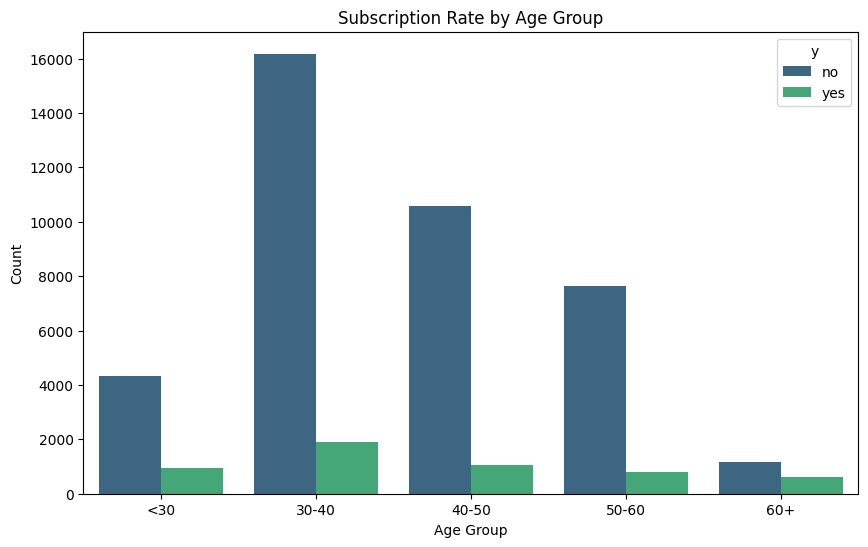

In [61]:
#Hypothesis 1:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
age_bins = [0, 30, 40, 50, 60, 100]
age_labels = ['<30', '30-40', '40-50', '50-60', '60+']
data['age_group'] = pd.cut(data['age'], bins=age_bins, labels=age_labels, right=False)
sns.countplot(x='age_group', hue='y', data=data, palette='viridis')
plt.title('Subscription Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()



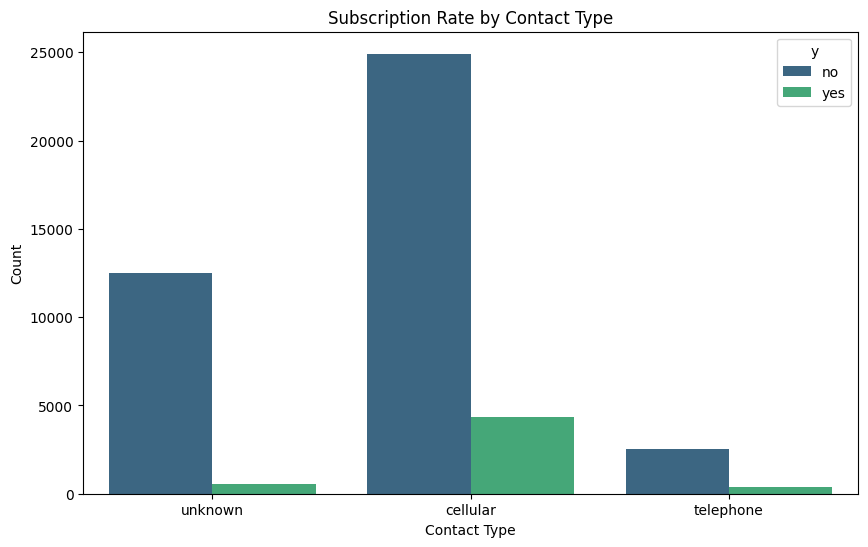

In [62]:
## Hyptothesis 2
plt.figure(figsize=(10, 6))
sns.countplot(x='contact', hue='y', data=data, palette='viridis')
plt.title('Subscription Rate by Contact Type')
plt.xlabel('Contact Type')
plt.ylabel('Count')
plt.show()


/var/folders/k9/d1czdmc507s2_10s7xd2m8200000gn/T/ipykernel_10909/4278182316.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='y', y='emp.var.rate', data=bank_additional, palette='viridis')


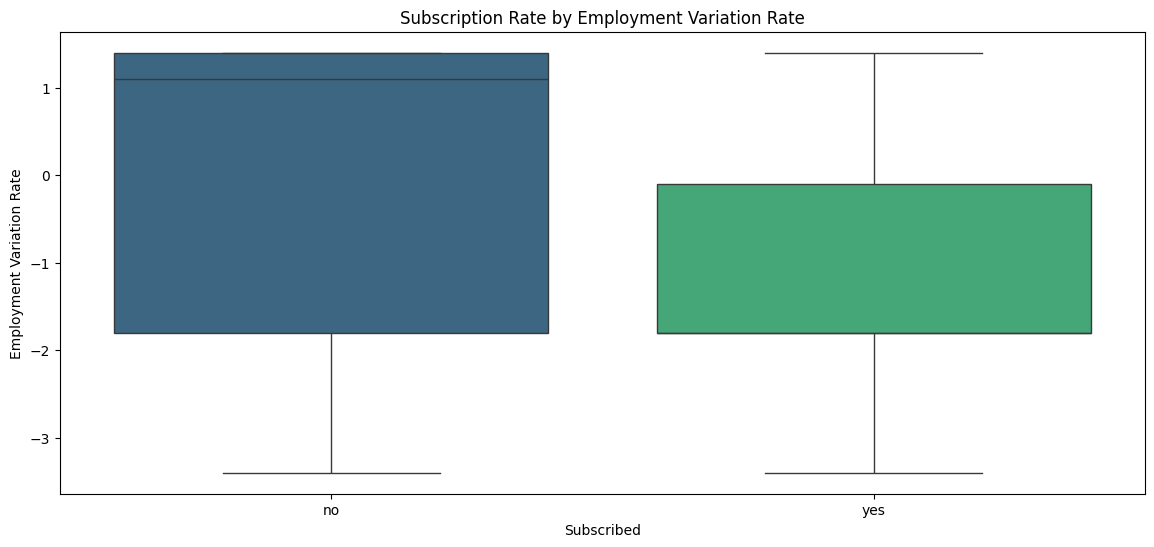

/var/folders/k9/d1czdmc507s2_10s7xd2m8200000gn/T/ipykernel_10909/4278182316.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='y', y='cons.price.idx', data=bank_additional, palette='viridis')


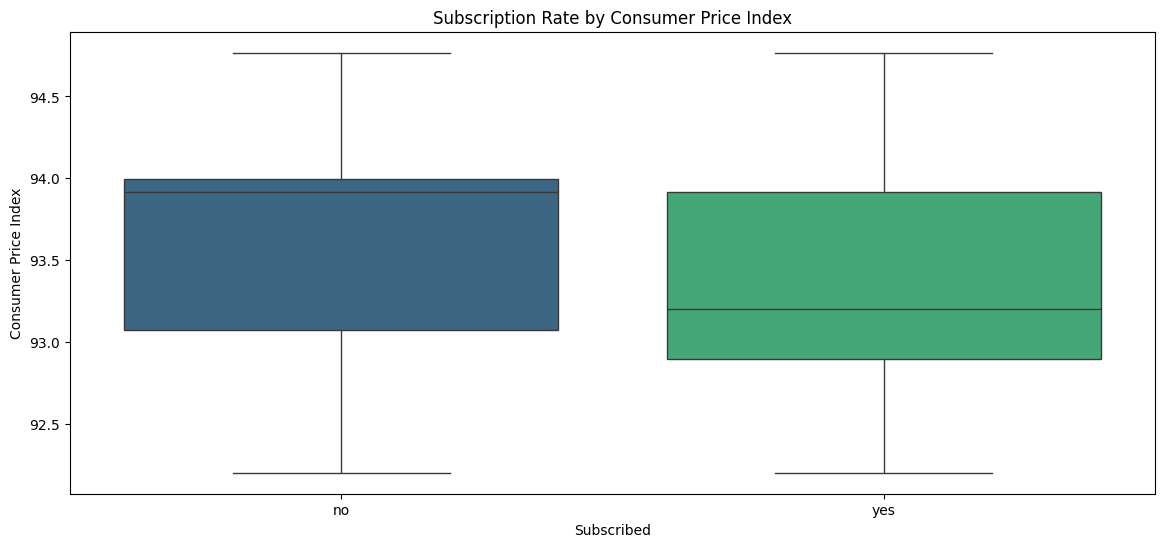

In [63]:
# Hypothesis 3: Economic indicators' impact on subscription rate
plt.figure(figsize=(14, 6))
sns.boxplot(x='y', y='emp.var.rate', data=bank_additional, palette='viridis')
plt.title('Subscription Rate by Employment Variation Rate')
plt.xlabel('Subscribed')
plt.ylabel('Employment Variation Rate')
plt.show()

plt.figure(figsize=(14, 6))
sns.boxplot(x='y', y='cons.price.idx', data=bank_additional, palette='viridis')
plt.title('Subscription Rate by Consumer Price Index')
plt.xlabel('Subscribed')
plt.ylabel('Consumer Price Index')
plt.show()

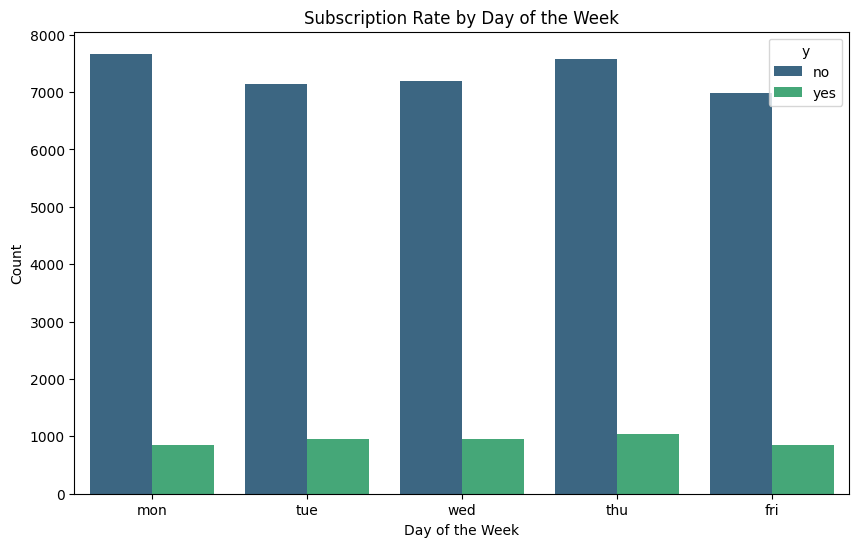

In [64]:
# Hypothesis 4: Success rate by day of the week
plt.figure(figsize=(10, 6))
sns.countplot(x='day_of_week', hue='y', data=bank_additional, palette='viridis')
plt.title('Subscription Rate by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.show()

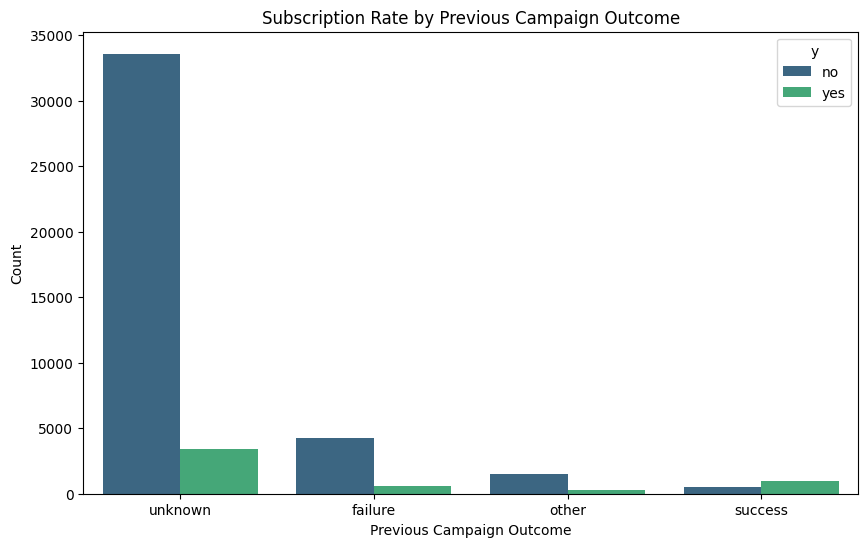

In [65]:
# Hypothesis 5: Previous campaign outcome impact on subscription rate
plt.figure(figsize=(10, 6))
sns.countplot(x='poutcome', hue='y', data=data, palette='viridis')
plt.title('Subscription Rate by Previous Campaign Outcome')
plt.xlabel('Previous Campaign Outcome')
plt.ylabel('Count')
plt.show()

/var/folders/k9/d1czdmc507s2_10s7xd2m8200000gn/T/ipykernel_10909/1319497156.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='y', data=data, palette='viridis')


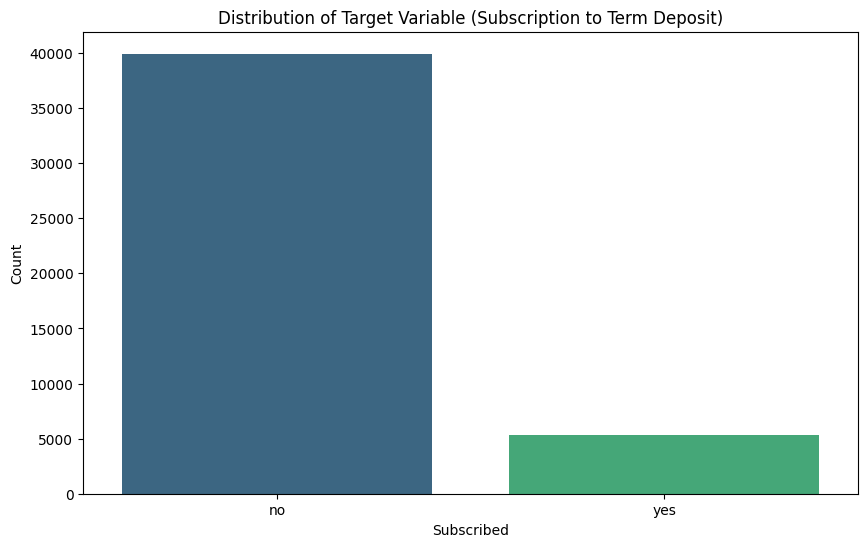

In [66]:
# Hypothesis 6: Distribution of target variable y
plt.figure(figsize=(10, 6))
sns.countplot(x='y', data=data, palette='viridis')
plt.title('Distribution of Target Variable (Subscription to Term Deposit)')
plt.xlabel('Subscribed')
plt.ylabel('Count')
plt.show()

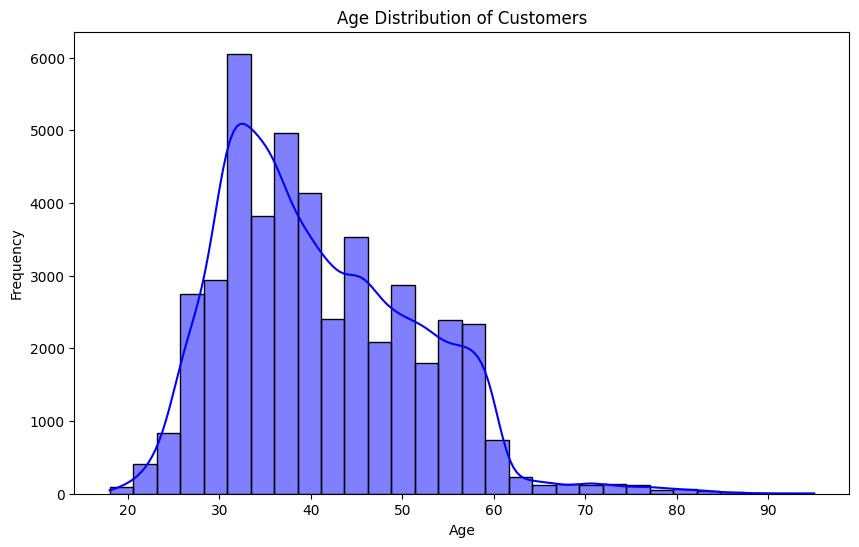

In [67]:

# Hypothesis 7: Age distribution of customers
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], bins=30, kde=True, color='blue')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

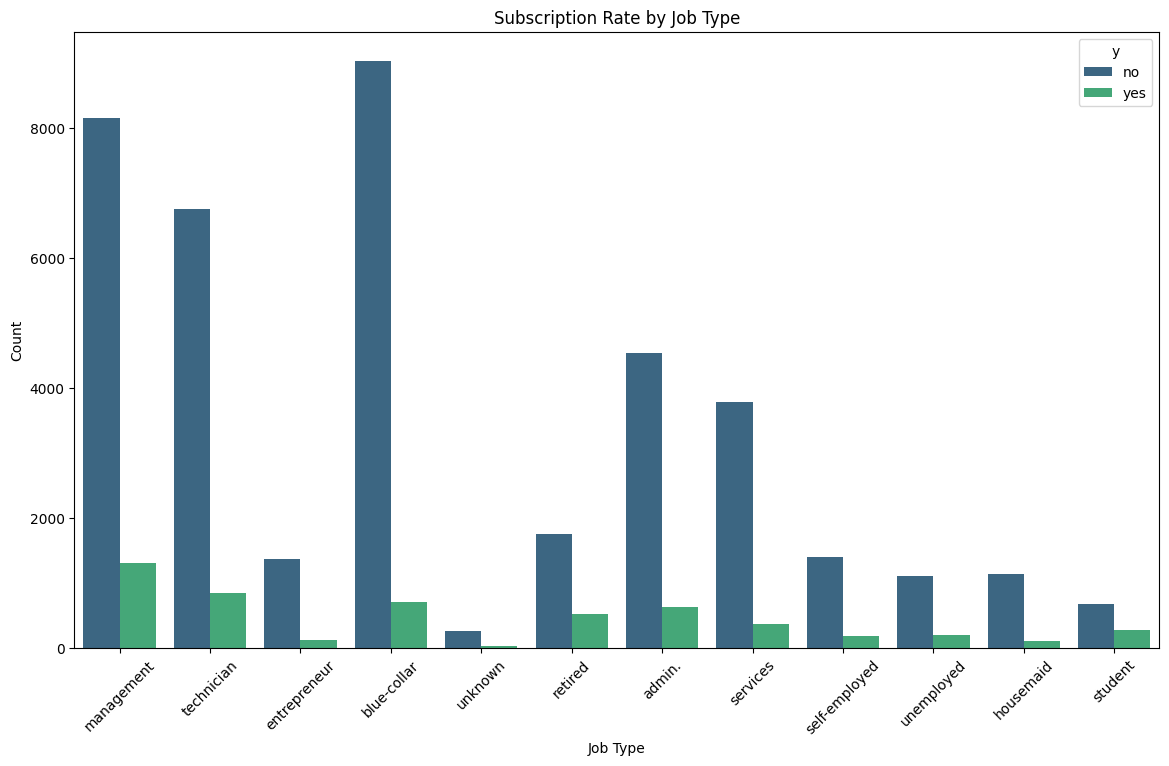

In [68]:
# Hypothesis 8: Relationship between job type and subscription rate
plt.figure(figsize=(14, 8))
sns.countplot(x='job', hue='y', data=data, palette='viridis')
plt.title('Subscription Rate by Job Type')
plt.xlabel('Job Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

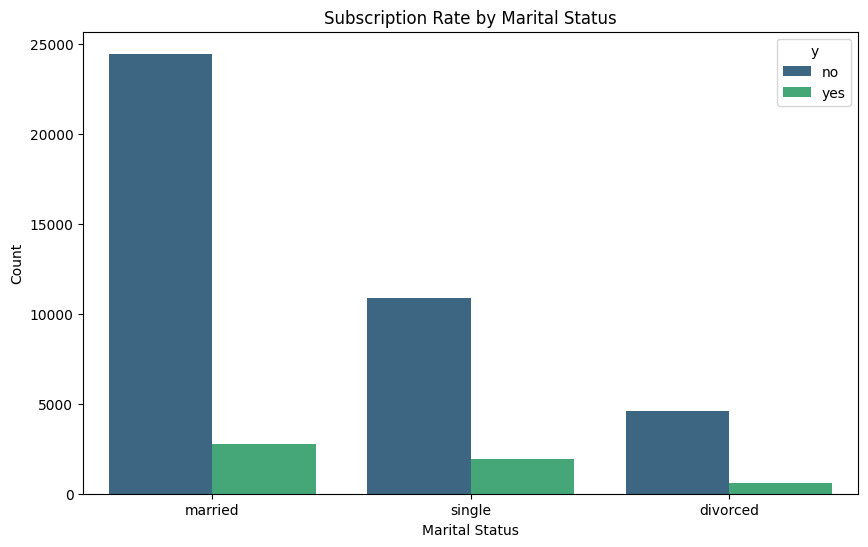

In [69]:
# Hypothesis 9: Effect of marital status on subscription rate
plt.figure(figsize=(10, 6))
sns.countplot(x='marital', hue='y', data=data, palette='viridis')
plt.title('Subscription Rate by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

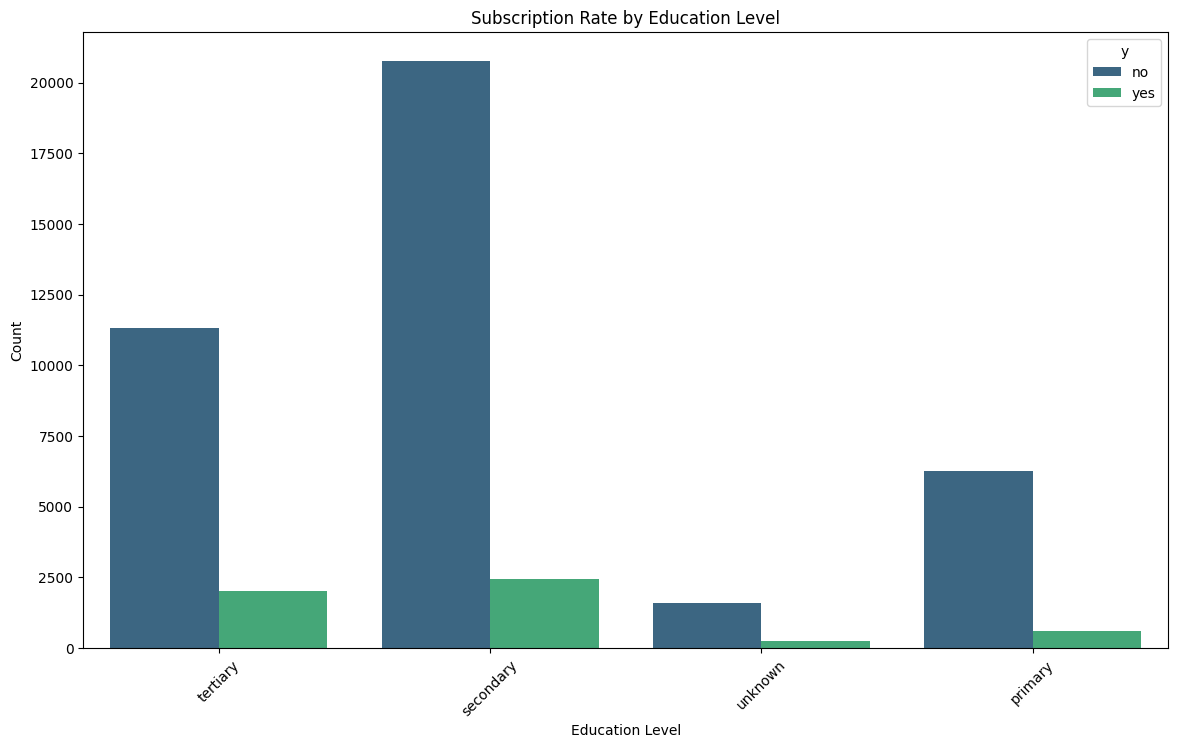

In [70]:
# Hypothesis 10: Education level's impact on subscription
plt.figure(figsize=(14, 8))
sns.countplot(x='education', hue='y', data=data, palette='viridis')
plt.title('Subscription Rate by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

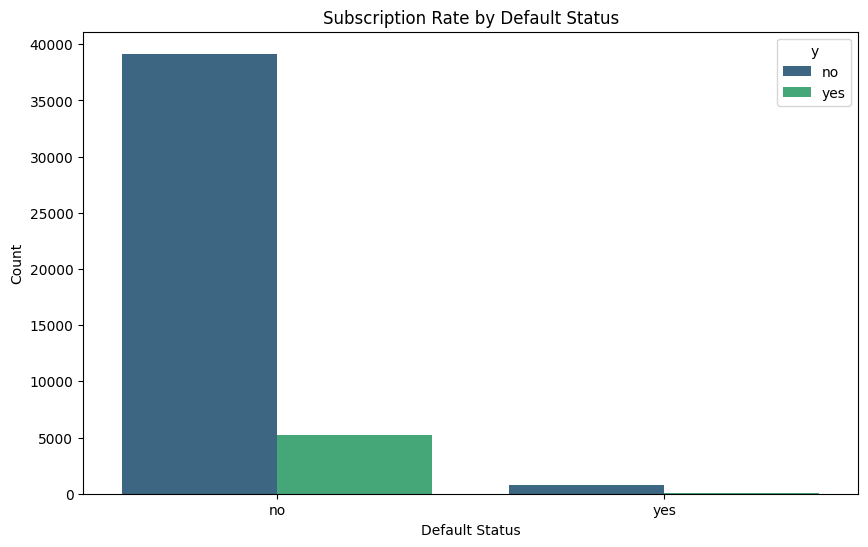

In [71]:
# Hypothesis 11: Default status vs. subscription rate
plt.figure(figsize=(10, 6))
sns.countplot(x='default', hue='y', data=data, palette='viridis')
plt.title('Subscription Rate by Default Status')
plt.xlabel('Default Status')
plt.ylabel('Count')
plt.show()

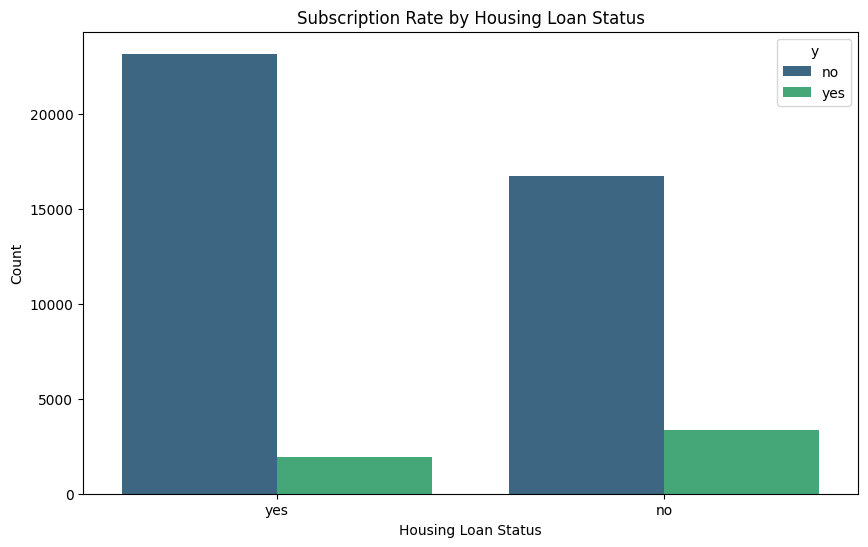

In [72]:

# Hypothesis 12: Housing loan status vs. subscription rate
plt.figure(figsize=(10, 6))
sns.countplot(x='housing', hue='y', data=data, palette='viridis')
plt.title('Subscription Rate by Housing Loan Status')
plt.xlabel('Housing Loan Status')
plt.ylabel('Count')
plt.show()

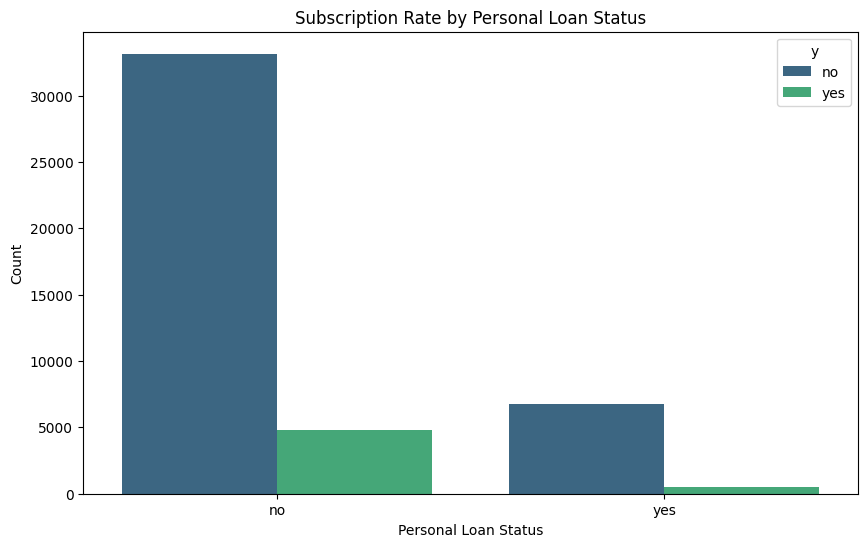

In [74]:
# Hypothesis 13: Personal loan status vs. subscription rate
plt.figure(figsize=(10, 6))
sns.countplot(x='loan', hue='y', data=data, palette='viridis')
plt.title('Subscription Rate by Personal Loan Status')
plt.xlabel('Personal Loan Status')
plt.ylabel('Count')
plt.show()

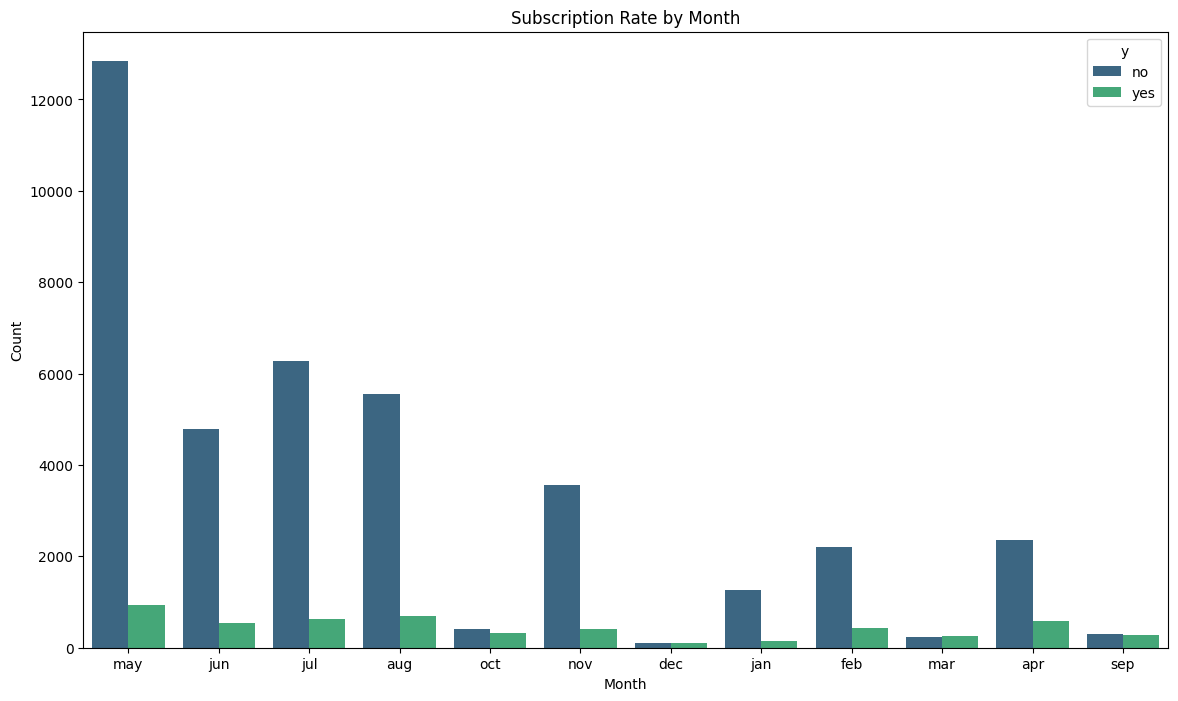

In [78]:
# Hypothesis 14: Month-wise subscription distribution
plt.figure(figsize=(14, 8))
sns.countplot(x='month', hue='y', data=data, palette='viridis')
plt.title('Subscription Rate by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

## Model Building

## Model Selection

## Performance Deploying

## Deploy the Model

## Convert ML Metrics to Business Metrics 

## Explanation of Results to Business

## The End. Thanks for viewing our presentation.